In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from HJM import HJM_Model

### References: 
- Angelini, F. and Herzel, S., 2005. Consistent calibration of HJM models to cap implied volatilities. Journal of Futures Markets: Futures, Options, and Other Derivative Products, 25(11), pp.1093-1120.
- Björk, T. and Christensen, B.J., 1999. Interest rate dynamics and consistent forward rate curves. Mathematical Finance, 9(4), pp.323-348.

## Read the data and calculate important variables

In [2]:
cap_data = pd.read_csv('cap_market_price.csv')
cap_data['T'] = cap_data['Year fraction, t'].cumsum()
cap_data['forward_swap_rate'] = zcb_curve_to_forward_swap_curve(list(cap_data['P(0,T)'])[1:], list(cap_data['T'])[1:])
cap_data['forward_rate'] = zcb_curve_to_forward_curve(list(cap_data['P(0,T)'])[1:], list(cap_data['T'])[1:])
cap_vols = cap_data["Market cap vol"].values[1:-1]
cap_prices = cap_data["Market cap price"].values[1:-1]

forward_curve = cap_data["forward_rate"].values[1:-1]
forward_swap_curve = cap_data["forward_swap_rate"].values[1:-1]
time_to_reset_date = cap_data["T"].values[1:-1]
taus = cap_data["Year fraction, t"].values
tenors = cap_data["T"].values
zcb_prices = cap_data["P(0,T)"].values[1:]

cap_data

,Time,Date,"Year fraction, t","P(0,T)",Market cap vol,Market cap price,T,forward_swap_rate,forward_rate
0,T0,9/28/2024,0.00,1.000000,NaN,NaN,0.00,NaN,0.046895
1,3M,12/28/2024,0.25,0.988412,0.249700,0.000477,0.25,0.039161,0.039161
2,6M,3/28/2025,0.25,0.978829,0.249700,0.001219,0.50,0.036063,0.032940
3,9M,6/28/2025,0.25,0.970834,0.249700,0.001990,0.75,0.034680,0.031880
4,1Y,9/28/2025,0.25,0.963158,0.266650,0.002982,1.00,0.033537,0.030052
5,1Y 3M,12/28/2025,0.25,0.955976,0.283600,0.004110,1.25,0.032773,0.029661
6,1Y 6M,3/28/2026,0.25,0.948939,0.300550,0.005395,1.50,0.032314,0.029965
7,1Y 9M,6/28/2026,0.25,0.941883,0.317500,0.006859,1.75,0.031983,0.029945
8,2Y,9/28/2026,0.25,0.934884,0.321875,0.008234,2.00,0.031778,0.030299
9,2Y 3M,12/28/2026,0.25,0.927856,0.326250,0.009698,2.25,0.031586,0.029997


## Gaussian HJM Implementation

### We will try 3 consistent families of diffusion-term function, and their combinations, such as HW-HW, HW-MM.

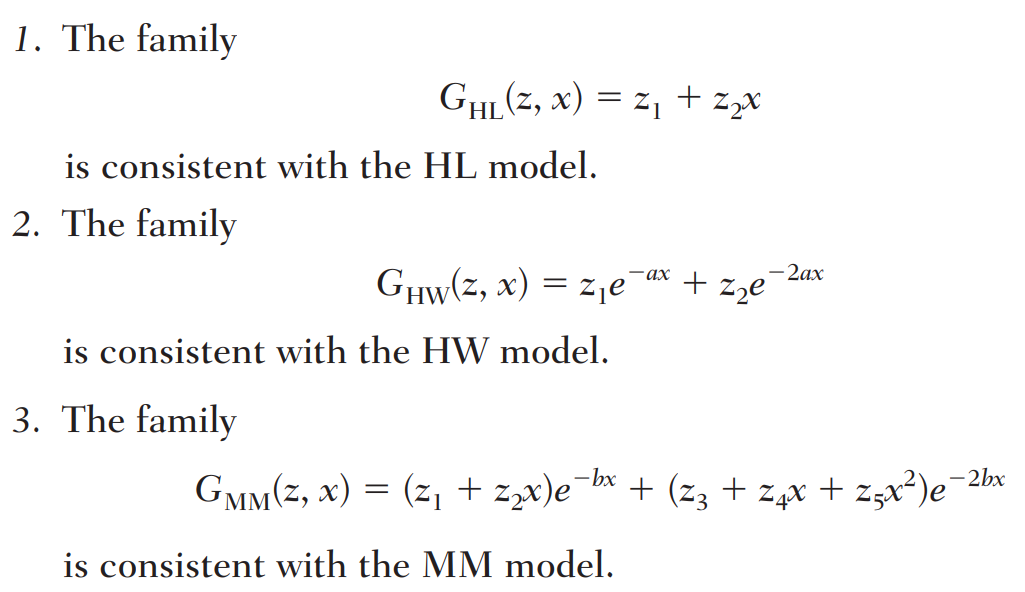

### Which are consistent with the following sigma functions from different models.

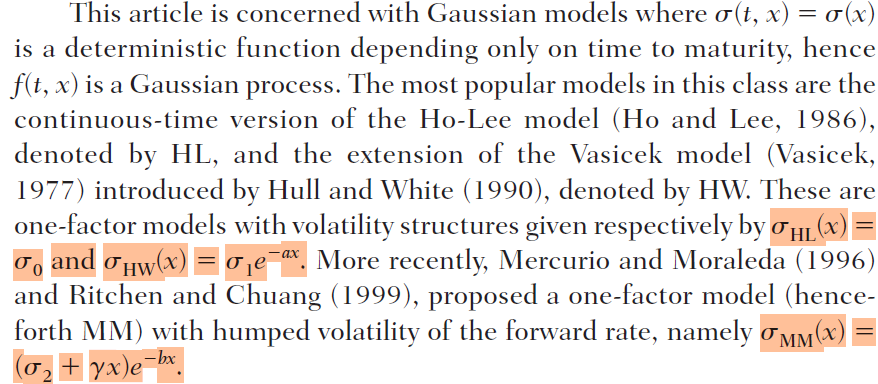

### Model calibration consists of 2 main steps
- Fit the ZCB curve with consistent G function (depending on the model choice we choose)
- Use the fitted G function to calibrate actual model parameters
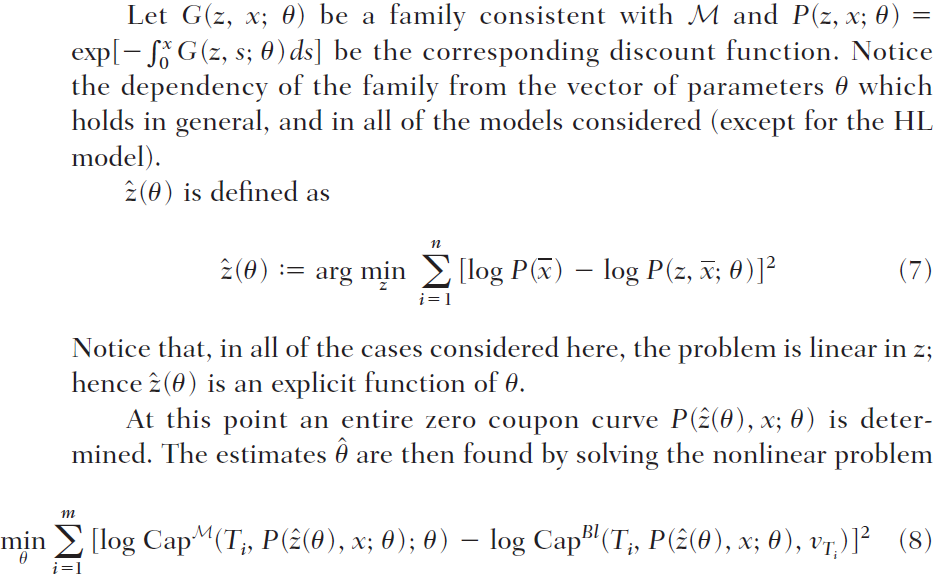

## 1-Factor model fitting (Ho and Lee)

We fit the consistent G function with the ZCB curve first
ZCB fitting result (G function):
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.5423556855748536e-06
             x: [ 3.524e-02 -1.456e-03]
           nit: 70
          nfev: 138
 final_simplex: (array([[ 3.524e-02, -1.456e-03],
                       [ 3.524e-02, -1.456e-03],
                       [ 3.524e-02, -1.456e-03]]), array([ 3.542e-06,  3.542e-06,  3.542e-06]))
--------------------------------------------
With the fitted consistent G function, we then calibrate the model parameters
price fitting result:
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.3298721766433036
             x: [ 3.022e-01]
           nit: 29
          nfev: 58
 final_simplex: (array([[ 3.022e-01],
                       [ 3.022e-01]]), array([ 3.299e-01,  3.299e-01]))
--------------------------------------------
Compare 

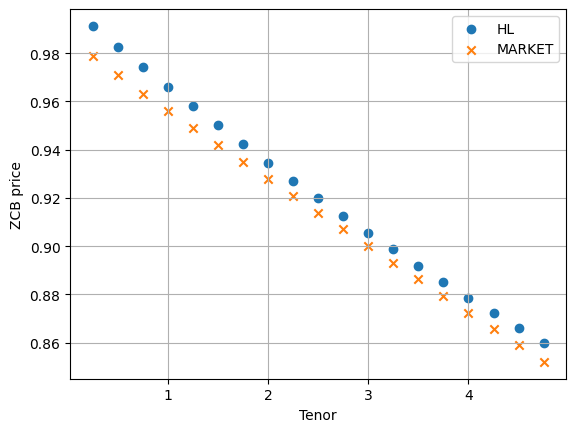

--------------------------------------------
Compare the implied volatility


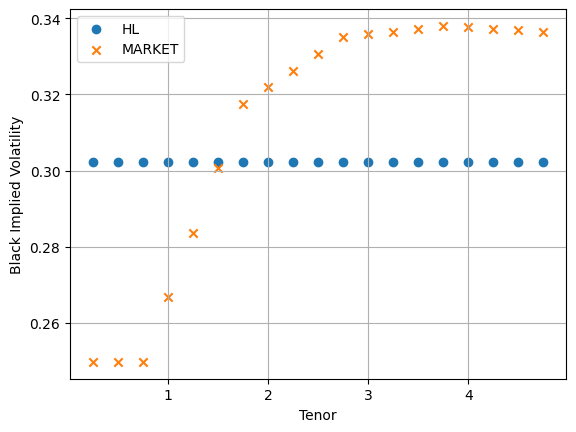

In [3]:
HL_model = HJM_Model(family="HL")

params = np.array([0.1])#initial model parameter
g_params = np.array([0.01, 0.01])#initial parameters for G function

print('We fit the consistent G function with the ZCB curve first')
zcb_fit_result = HL_model.calibrate_zcb_curve(zcb_prices, tenors[1:], g_params)
g_params = zcb_fit_result.x
print("ZCB fitting result (G function):")
print(zcb_fit_result)
print('--------------------------------------------')
print('With the fitted consistent G function, we then calibrate the model parameters')
price_fit_result = HL_model.calibrate_cap_price(
    cap_vols,
    forward_swap_curve,
    time_to_reset_date,
    taus,
    tenors,
    params,
    g_params,
)
params = price_fit_result.x
print("price fitting result:")
print(price_fit_result)
print('--------------------------------------------')
model_zcb_curve_HL = HL_model.cal_zcb_from_G(tenors, g_params)
print('Compare the ZCB curve from G function')
plt.scatter(tenors[1:-1], model_zcb_curve_HL[1:-1], label= 'HL')
plt.scatter(tenors[1:-1], zcb_prices[1:], marker='x', label= 'MARKET')
plt.ylabel('ZCB price')
plt.xlabel('Tenor')
plt.legend()
plt.grid()
plt.show()
print('--------------------------------------------')
print('Compare the implied volatility')
model_iv_HL, _= (
    HL_model.evaluate_cap_prices(
        params,
        g_params,
        cap_vols,
        forward_swap_curve,#Calibrate ATM caps
        time_to_reset_date,
        taus,
        tenors,
    )
)

plt.scatter(tenors[1:-1], model_iv_HL, label= 'HL')
plt.scatter(tenors[1:-1], cap_vols, marker='x', label= 'MARKET')
plt.ylabel('Black Implied Volatility')
plt.xlabel('Tenor')
plt.legend()
plt.grid()
plt.show()

## 1-Factor model fitting (Hull and White)

We fit the consistent G function with the ZCB curve first
ZCB fitting result (G function):
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.4024933069828234e-06
             x: [ 2.302e-02  1.244e-02  3.528e-02]
           nit: 252
          nfev: 470
 final_simplex: (array([[ 2.302e-02,  1.244e-02,  3.528e-02],
                       [ 2.302e-02,  1.244e-02,  3.528e-02],
                       [ 2.302e-02,  1.244e-02,  3.528e-02],
                       [ 2.302e-02,  1.244e-02,  3.528e-02]]), array([ 3.402e-06,  3.402e-06,  3.402e-06,  3.402e-06]))
--------------------------------------------
With the fitted consistent G function, we then calibrate the model parameters
price fitting result:
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.06251260903682905
             x: [ 2.505e-01 -8.399e-02]
           nit: 72
          nfev: 138
 final_simplex: (array([[ 2.5

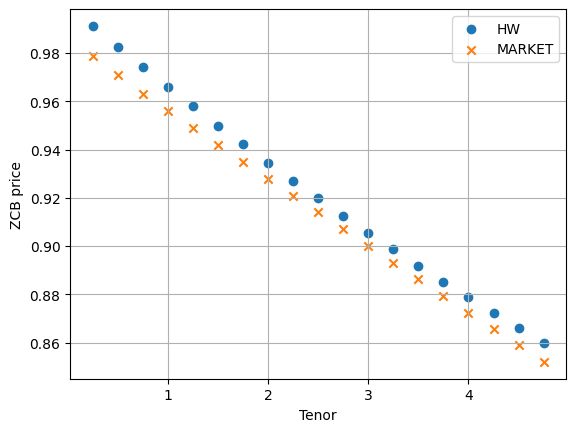

--------------------------------------------
Compare the implied volatility


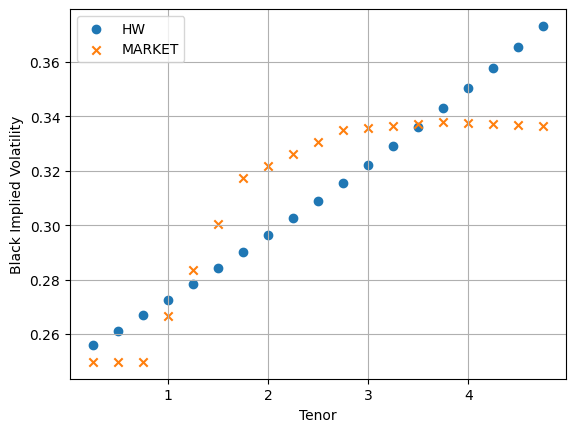

In [4]:
HW_model = HJM_Model(family="HW")

params = np.array([0.1, 0.1])#initial model parameter
g_params = np.array([0.01, 0.01, 0.01])#initial parameters for G function

print('We fit the consistent G function with the ZCB curve first')
zcb_fit_result = HW_model.calibrate_zcb_curve(zcb_prices, tenors[1:], g_params)
g_params = zcb_fit_result.x
print("ZCB fitting result (G function):")
print(zcb_fit_result)
print('--------------------------------------------')
print('With the fitted consistent G function, we then calibrate the model parameters')
price_fit_result = HW_model.calibrate_cap_price(
    cap_vols,
    forward_swap_curve,
    time_to_reset_date,
    taus,
    tenors,
    params,
    g_params,
)
params = price_fit_result.x
print("price fitting result:")
print(price_fit_result)
print('--------------------------------------------')
model_zcb_curve_HW = HW_model.cal_zcb_from_G(tenors, g_params)
print('Compare the ZCB curve from G function')
plt.scatter(tenors[1:-1], model_zcb_curve_HW[1:-1], label= 'HW')
plt.scatter(tenors[1:-1], zcb_prices[1:], marker='x', label= 'MARKET')
plt.ylabel('ZCB price')
plt.xlabel('Tenor')
plt.legend()
plt.grid()
plt.show()
print('--------------------------------------------')
print('Compare the implied volatility')
model_iv_HW, _= (
    HW_model.evaluate_cap_prices(
        params,
        g_params,
        cap_vols,
        forward_swap_curve,#Calibrate ATM caps
        time_to_reset_date,
        taus,
        tenors,
    )
)

plt.scatter(tenors[1:-1], model_iv_HW, label= 'HW')
plt.scatter(tenors[1:-1], cap_vols, marker='x', label= 'MARKET')
plt.ylabel('Black Implied Volatility')
plt.xlabel('Tenor')
plt.legend()
plt.grid()
plt.show()

## 1-Factor model fitting (MM)

We fit the consistent G function with the ZCB curve first
ZCB fitting result (G function):
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.5405231992122456e-05
             x: [ 6.278e-02  1.453e-02  5.304e+00 -2.322e+01  2.235e+00
                  1.609e-02]
           nit: 777
          nfev: 1339
 final_simplex: (array([[ 6.278e-02,  1.453e-02, ...,  2.235e+00,
                         1.609e-02],
                       [ 6.278e-02,  1.453e-02, ...,  2.235e+00,
                         1.609e-02],
                       ...,
                       [ 6.278e-02,  1.453e-02, ...,  2.235e+00,
                         1.609e-02],
                       [ 6.278e-02,  1.453e-02, ...,  2.235e+00,
                         1.609e-02]]), array([ 4.541e-05,  4.541e-05,  4.541e-05,  4.541e-05,
                        4.541e-05,  4.541e-05,  4.541e-05]))
--------------------------------------------
With the fitted consistent G functi

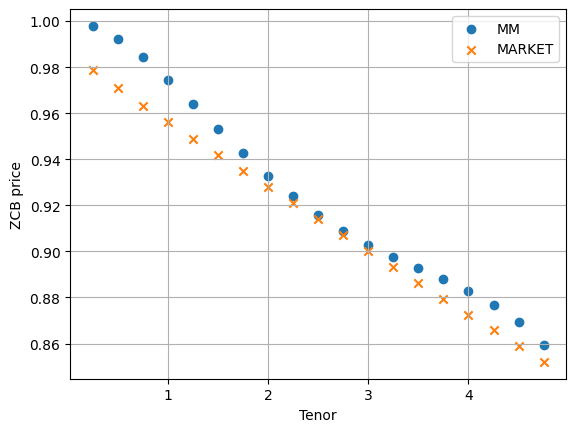

--------------------------------------------
Compare the implied volatility


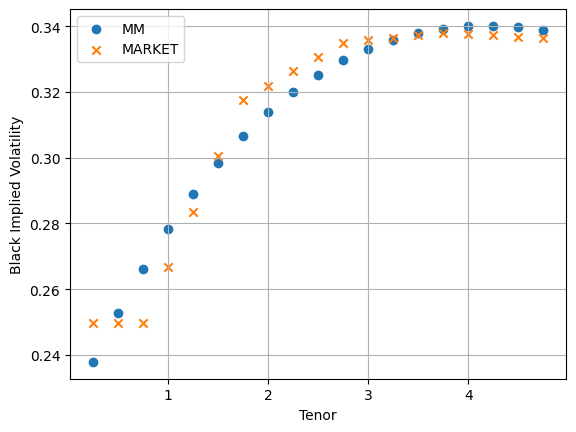

In [5]:
MM_model = HJM_Model(family="MM")

params = np.array([0.1, 0.1, 0.1])#initial model parameter
g_params = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])#initial parameters for G function

print('We fit the consistent G function with the ZCB curve first')
zcb_fit_result = MM_model.calibrate_zcb_curve(zcb_prices, tenors[1:], g_params)
g_params = zcb_fit_result.x
print("ZCB fitting result (G function):")
print(zcb_fit_result)
print('--------------------------------------------')
print('With the fitted consistent G function, we then calibrate the model parameters')
price_fit_result = MM_model.calibrate_cap_price(
    cap_vols,
    forward_swap_curve,
    time_to_reset_date,
    taus,
    tenors,
    params,
    g_params,
)
params = price_fit_result.x
print("price fitting result:")
print(price_fit_result)
print('--------------------------------------------')
model_zcb_curve_MM = MM_model.cal_zcb_from_G(tenors, g_params)
print('Compare the ZCB curve from G function')
plt.scatter(tenors[1:-1], model_zcb_curve_MM[1:-1], label= 'MM')
plt.scatter(tenors[1:-1], zcb_prices[1:], marker='x', label= 'MARKET')
plt.ylabel('ZCB price')
plt.xlabel('Tenor')
plt.legend()
plt.grid()
plt.show()
print('--------------------------------------------')
print('Compare the implied volatility')
model_iv_MM, _= (
    MM_model.evaluate_cap_prices(
        params,
        g_params,
        cap_vols,
        forward_swap_curve,#Calibrate ATM caps
        time_to_reset_date,
        taus,
        tenors,
    )
)

plt.scatter(tenors[1:-1], model_iv_MM, label= 'MM')
plt.scatter(tenors[1:-1], cap_vols, marker='x', label= 'MARKET')
plt.ylabel('Black Implied Volatility')
plt.xlabel('Tenor')
plt.legend()
plt.grid()
plt.show()

## Comparison of ZCB curve between models

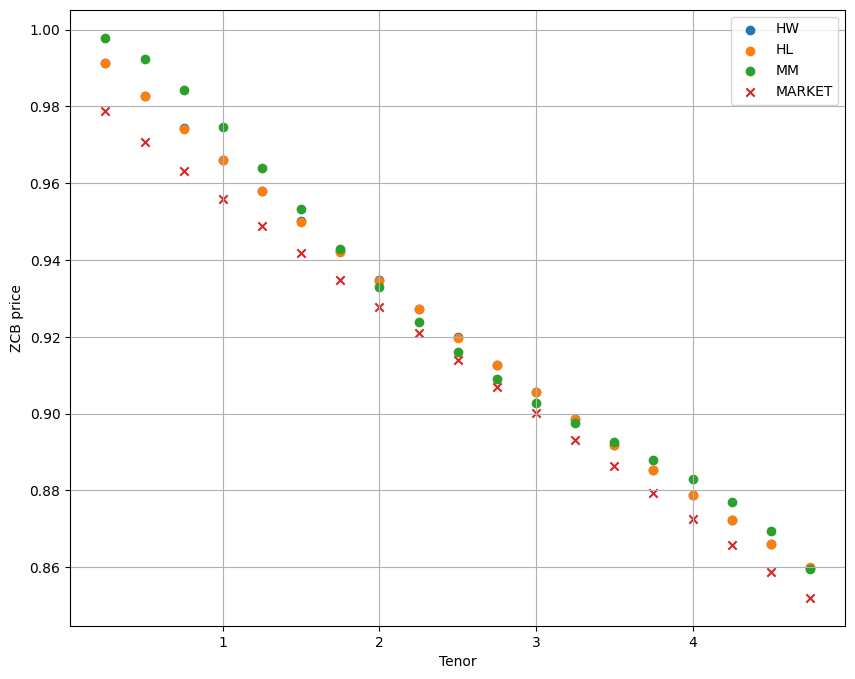

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(tenors[1:-1], model_zcb_curve_HL[1:-1], label= 'HW')
plt.scatter(tenors[1:-1], model_zcb_curve_HW[1:-1], label= 'HL')
plt.scatter(tenors[1:-1], model_zcb_curve_MM[1:-1], label= 'MM')
plt.scatter(tenors[1:-1], zcb_prices[1:], marker='x', label= 'MARKET')
plt.ylabel('ZCB price')
plt.xlabel('Tenor')
plt.grid()
plt.legend()

## Comparison of implied volatility between models

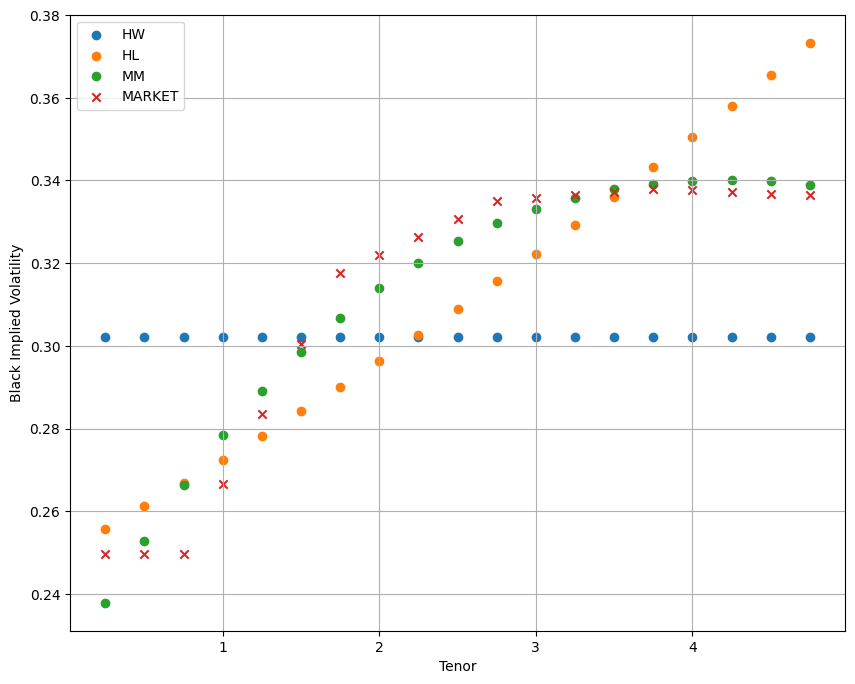

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(tenors[1:-1], model_iv_HL, label= 'HW')
plt.scatter(tenors[1:-1], model_iv_HW, label= 'HL')
plt.scatter(tenors[1:-1], model_iv_MM, label= 'MM')
plt.scatter(tenors[1:-1], cap_vols, marker='x', label= 'MARKET')
plt.ylabel('Black Implied Volatility')
plt.xlabel('Tenor')
plt.grid()
plt.legend()